# Importing libraries

### Importing all libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
import json

from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

import time

%load_ext autoreload
%autoreload 2
import importlib

import Text_preprocessing_tools as tpp
importlib.reload(tpp)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'Text_preprocessing_tools' from 'C:\\Ramiro\\Data Science\\0_DataScientest\\02_DS_project\\Raku_ten_23\\Text_preprocessing_tools.py'>

In [86]:
my_seed = 123

# Import text data

In [187]:
## features and target
# df_X = pd.read_csv('../datasets/X_train_update.csv', index_col = 0)
# df_y = pd.read_csv('../datasets/Y_train_CVw08PX.csv', index_col = 0)

# ## merge feature and target ? ---> it maybe better for preprocessing, then separate for model training
# df = pd.concat([df_y,df_X], axis = 1)
# df['prdtypecode'].astype(str)

## class labels
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';').drop('target', axis = 1)
product_class['prdtypecode'].astype(str)
tpp.concat_class_code(product_class)

In [188]:
display(df_X.head())
print("Features dataframe shape = ",df_X.shape)

display(df_y.head())
print("Target dataframe shape = ",df_y.shape)

display(product_class.head())
print("Product Class codes, shape = ",product_class.shape)

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


Features dataframe shape =  (84916, 4)


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


Target dataframe shape =  (84916, 1)


,prdtypecode,prodtype,class_code
0,10,livres_adulte,livres_adulte___10
1,40,jeux_videos_import,jeux_videos_import___40
2,50,accessoires_jeux_videos,accessoires_jeux_videos___50
3,60,jeux_et_consoles_retro,jeux_et_consoles_retro___60
4,1140,goodies_geek,goodies_geek_1140


Product Class codes, shape =  (27, 3)


### Rename variables

In [89]:
## Rename the variable 'designation' by 'title' which is more convenient

df.rename({'designation':'title'}, axis = 1, inplace = True)
df.head()

,prdtypecode,title,description,productid,imageid
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


# Text Data Exploration and Data Preprocessing

### plot the count of products per category

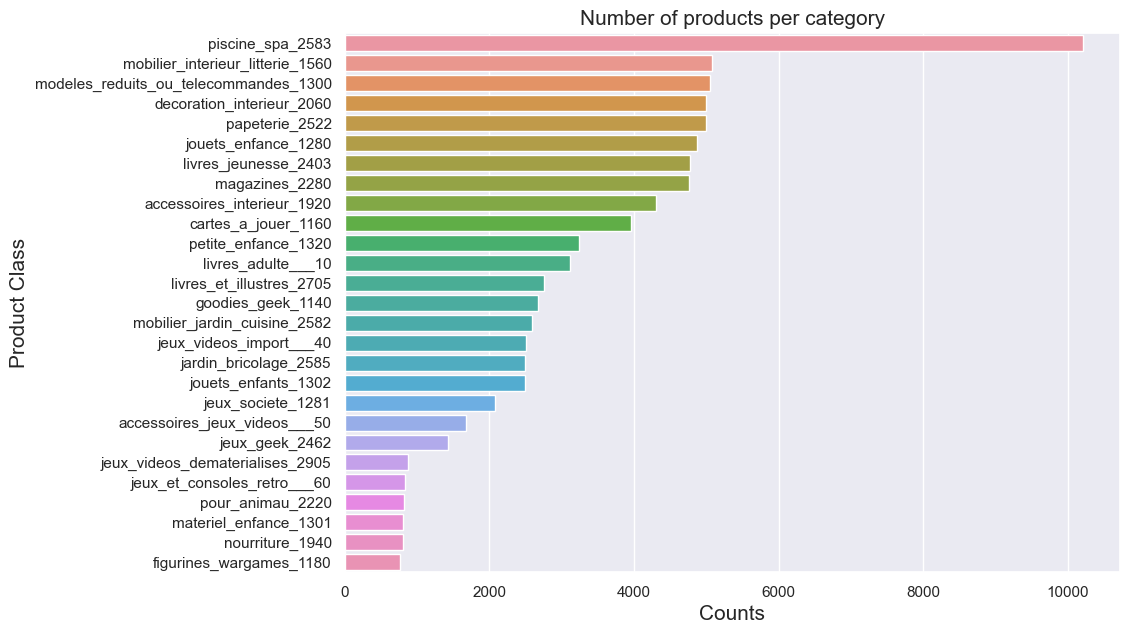

In [90]:
tpp.plot_counts_per_category(df, product_class)

### Plot distribution of missing values

In [91]:
nb_missingDescr = df['description'].isna().sum()
print(f'There are {nb_missingDescr} items ({round(nb_missingDescr/df.shape[0]*100,2)} %) with absent description \n')

display(df.info())

There are 29800 items (35.09 %) with absent description 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prdtypecode  84916 non-null  int64 
 1   title        84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


None

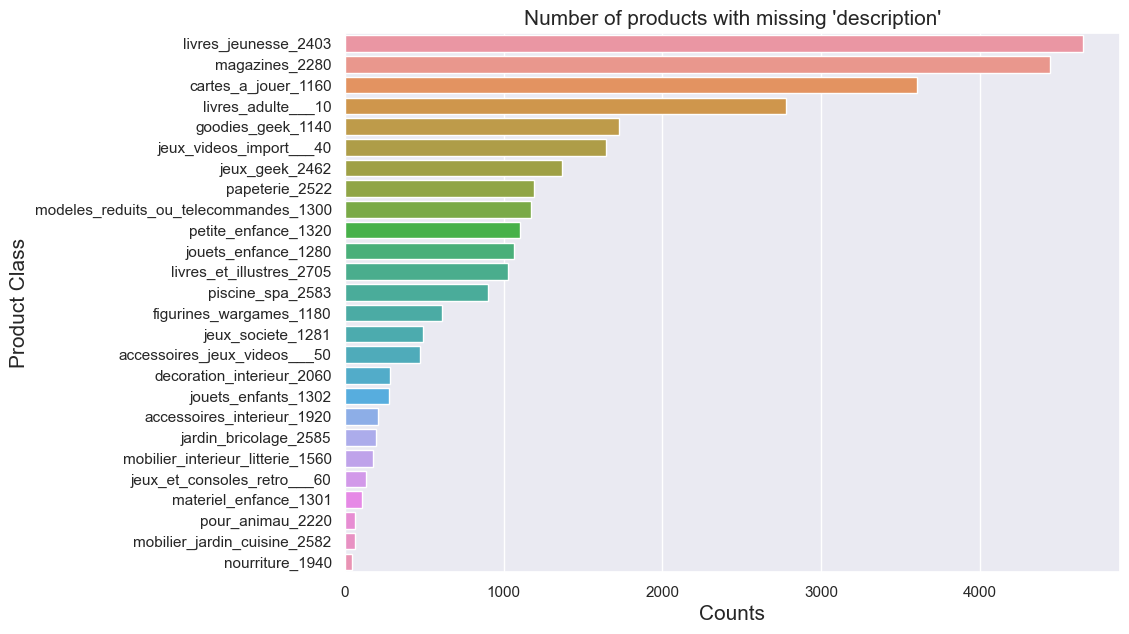

In [92]:
tpp.plot_missing_description_distribution(df, product_class)

## Feature engineering: title_descr
* concatenate 'title' and 'description' into a new variable 'title_descr'.  
* drop the now redundant columns 'title' and 'description'.  

In [93]:
tpp.concatenate_variables(df, 'title', 'description', nans_to = '', separator =' \n ', concat_col_name = 'title_descr', 
                          verbose = True)
df.head()

Columns 'title' and 'description' have been concatenated in a new variable 'title_descr' 



,prdtypecode,title,description,productid,imageid,title_descr
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des Tuques \n Luc a des id&eacute;es...


**Drop redundant variables: Title & Description**

In [94]:
df.drop(['title','description'], axis = 1, inplace = True)

df.head()

,prdtypecode,productid,imageid,title_descr
0,10,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,2280,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,50,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,1280,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,2705,278535884,1077757786,La Guerre Des Tuques \n Luc a des id&eacute;es...


## HTML encoding

#### Detect proportion of HTML encoding

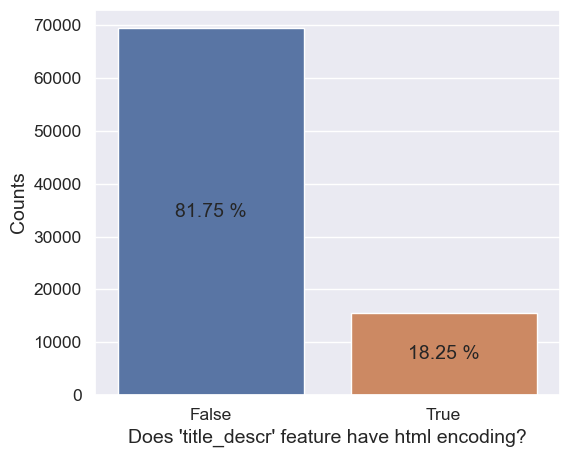

In [99]:
tpp.get_html_encoding_proportion(df, drop = True)

#### HTML parsing and decapitalization

In [101]:
tpp.html_parsing(df, 'title_descr', verbose = True)

Column 'title_descr' has been successfully HTML parsed and decapitalized.
	 HTML parsing takes 22.22 seconds 



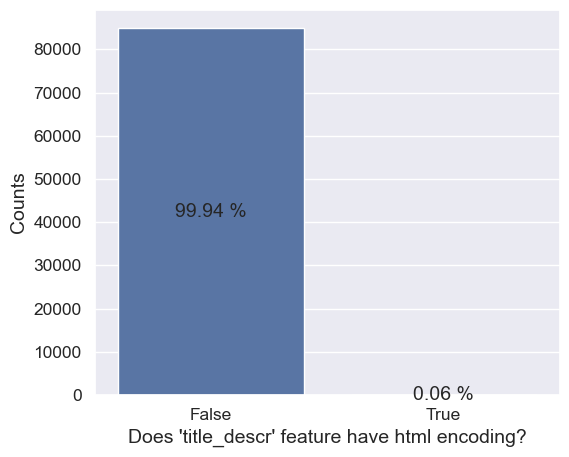

In [102]:
tpp.get_html_encoding_proportion(df, drop = True)

In [103]:
df.head()

,prdtypecode,productid,imageid,title_descr
0,10,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...
1,2280,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...
2,50,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...
3,1280,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...
4,2705,278535884,1077757786,la guerre des tuques \n luc a des idées de gra...


## Language detection
<div class="alert alert-warning">
<i class="fa fa-info-circle"></i> &emsp; 
    Language detection takes about 5 minutes. <strong> DO NOT RE DO IT IF NOT NEEDED.</strong>
</div> 

In [104]:
# df2 = df.iloc[:50,:].copy()
tpp.get_language(df, 'title_descr', correct = True, get_probs = True, verbose = True)


Main language detection takes 4.75 minutes.
	 Correction takes 3.72 seconds to crrect 13974 low confidence detections
	 A total of 7476 items have been reclassified as FR and 6498 as EN for simplicity.



In [106]:
df.head()

,prdtypecode,productid,imageid,title_descr,language,lang_prob
0,10,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,de,1.0
1,2280,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,fr,1.0
2,50,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,fr,1.0
3,1280,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,fr,1.0
4,2705,278535884,1077757786,la guerre des tuques \n luc a des idées de gra...,fr,1.0


#### Plot language distributions

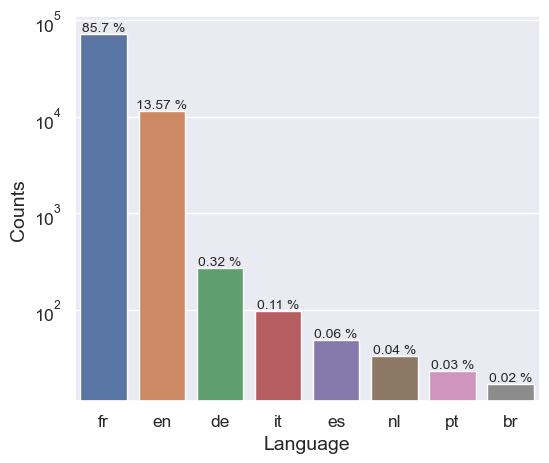

In [112]:
tpp.plot_language_distribution(df, Nb_2show = 8)

## Tokenize & Lemmatize text
* Use a tokenizer that keeps only word of 3 or more word characters: tokenizer = RegexpTokenizer(r"\w{3,}')
* Tokenize title_descr ---> get token lists
* Lematize each token list
* if uniques = True, get the unique lematized tokens (no duplicates). Keeps the order.

In [113]:
tokenizer  = RegexpTokenizer(r'\w{3,}')
lemmatizer = WordNetLemmatizer()

tpp.get_lemmatized_tokens(df, 'title_descr', tokenizer, 'lemma_tokens', lemmatizer, uniques = True)

Column 'title_descr' has been successfully tokenized.
	 Tokenization + Lemmatization takes 28.42 seconds 



In [114]:
df.head()

,prdtypecode,productid,imageid,title_descr,language,lang_prob,lemma_tokens
0,10,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,de,1.0,"[olivia, personalisiertes, notizbuch, 150, sei..."
1,2280,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,fr,1.0,"[journal, de, art, 133, 2001, son, marche, sal..."
2,50,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,fr,1.0,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,1280,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,fr,1.0,"[peluche, donald, europe, disneyland, 2000, ma..."
4,2705,278535884,1077757786,la guerre des tuques \n luc a des idées de gra...,fr,1.0,"[guerre, de, tuques, luc, idées, grandeur, veu..."


### Remove stop words

In [115]:
tpp.remove_stop_words(df, 'lemma_tokens', 'lemma_tokens', 'language', verbose = True)

Removing stop-words takes 22.86 seconds. 



In [127]:
df.head()

,prdtypecode,productid,imageid,title_descr,language,lang_prob,lemma_tokens
0,10,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,de,1.0,"[olivia, personalisiertes, notizbuch, 150, sei..."
1,2280,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,fr,1.0,"[journal, art, 133, 2001, marche, salon, asiat..."
2,50,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,fr,1.0,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,1280,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,fr,1.0,"[peluche, donald, europe, disneyland, 2000, ma..."
4,2705,278535884,1077757786,la guerre des tuques \n luc a des idées de gra...,fr,1.0,"[guerre, tuques, luc, idées, grandeur, veut, o..."


### Most common words per category

In [212]:
tpp.get_category_top_words(df, product_class, Nb_top_words = 8)


## chose which categories to display the most common words
## Set to_show() = 'all' to see every category

categories_to_show = [50, 1160, 1940, 2280, 2583]
tpp.display_category_top_words(product_class, to_show = categories_to_show)

,class_code,common_words
2,accessoires_jeux_videos___50,"[jeu, console, nintendo, haute, protection, compatible, manette, facile]"
5,cartes_a_jouer_1160,"[carte, magic, mtg, rare, commune, dragon, pokemon, pokémon]"
15,nourriture_1940,"[sucre, marque, bio, produit, sachet, ingrédients, café, lait]"
18,magazines_2280,"[france, journal, paris, revue, monde, magazine, petit, vie]"
23,piscine_spa_2583,"[piscine, eau, filtration, dimension, sol, pompe, kit, bleu]"


## Feature engineering: token_length
* Here the token count is performed after remving the stop words. It could also be possible to do before. The important thing is to keep the same metric for all items in the dataframe.
    
* Another option could be simply to get the counts before and after removing the stop words and short tokens. In this scenarion one can get token_len_raw counting short tokens and a token_len without them.

In [215]:
tpp.get_token_length(df, 'lemma_tokens', 'text_token_len', verbose = True)
df.head()

Token counting takes 0.03 seconds. 



,prdtypecode,productid,imageid,title_descr,language,lang_prob,lemma_tokens,text_token_len
0,10,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,de,1.0,"[olivia, personalisiertes, notizbuch, 150, sei...",9
1,2280,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,fr,1.0,"[journal, art, 133, 2001, marche, salon, asiat...",20
2,50,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,fr,1.0,"[grand, stylet, ergonomique, bleu, gamepad, ni...",50
3,1280,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,fr,1.0,"[peluche, donald, europe, disneyland, 2000, ma...",7
4,2705,278535884,1077757786,la guerre des tuques \n luc a des idées de gra...,fr,1.0,"[guerre, tuques, luc, idées, grandeur, veut, o...",18


### Display a descriptive statistics

In [218]:
df_stat = pd.DataFrame(df['text_token_len'].describe())
df_stat['text_token_len'] = [round(val,2) for val in df_stat['text_token_len']]
df_stat

,text_token_len
count,84916.00
mean,38.35
std,39.44
min,0.00
25%,7.00
50%,23.00
75%,61.00
max,515.00


### Plot token length distribution 

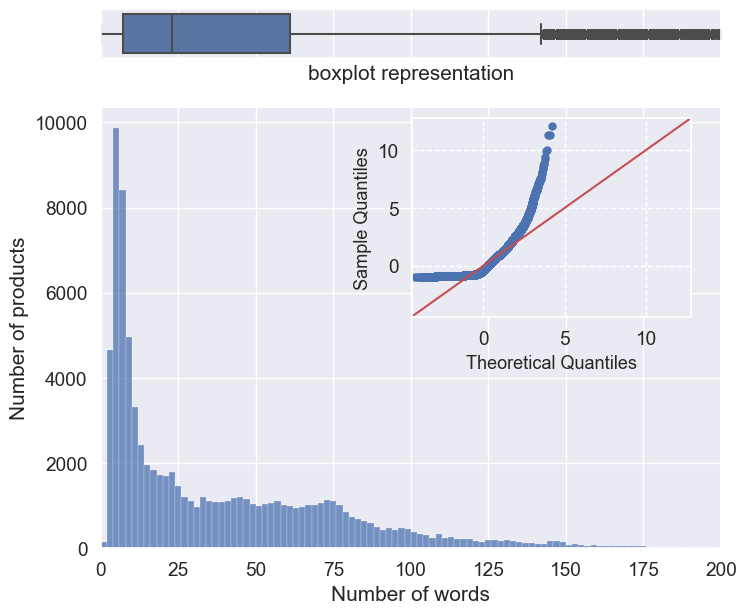

In [308]:
tpp.plot_token_len_distribution(df, xRange = [0,200], qqplot = True, quantiles = False) #[0,500]

### Run statitical test
* Distribution of token length per category
* ANOVA test

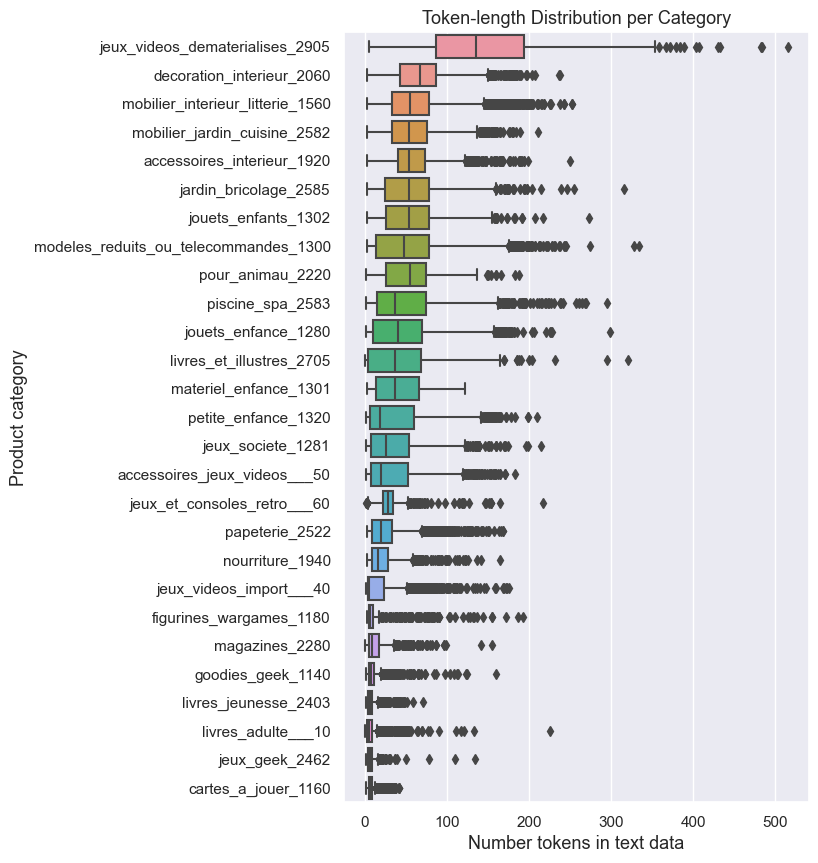

In [324]:
tpp.plot_token_len_distribution_per_category(df, product_class)

**ANOVA test**

In [ ]:
H0 = "There is NO correlation between 'text_token_len' and 'prdtypecode'"
H1 = "There is a correlation between  'text_token_len' and 'prdtypecode'"

In [326]:
tpp.run_anova_test(df,'text_token_len', 'prdtypecode')

,df,sum_sq,mean_sq,F,PR(>F)
prdtypecode,1.0,3.253826e+06,3.253826e+06,2145.152698,0.0
Residual,84914.0,1.287999e+08,1.516827e+03,NaN,NaN


H0 is rejected, H1 is accepted
ANOVA p-value =  0.0


## Save Preprocessed text data

In [26]:
write = False

if write:    
    filename = 'df_text_preprocessed' + date_time() + '.csv'
    
    df.to_csv(filename, header=True, index=False)
    print(filename)

df_text_preprocessed_20230807_2212.csv


# _______________________________________________________________
# Image Data Exploration


### plot 3 image from df idexes

### crop backgroud white color

### Get mean RGB distribution

# _______________________________________________________________
# Base models


* Random Forest @ vectorized text
* SVM.CSV model @ vectorized text  

<nbsp>
    
* Include other features:
    * language (one hot encoded)
    * token_len (raw)
    * token_len (clean)

## Import dataset
* Load Preprocessed dataframe is needed.

In [23]:
read = True
if read:
#     filename = 'df_text_preprocessed_20230805_1449' + '.csv'
    filename = './Preprocessed_data/df_text_preprocessed_20230807_2212' + '.csv'    
    
    
    df = pd.read_csv(filename)
    display(df.head())

,prdtypecode,productid,imageid,title_descr,lemma_tokens,language,text_token_len
0,10,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,"['olivia', 'personalisiertes', 'notizbuch', '1...",de,9
1,2280,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,"['journal', 'art', '133', '2001', 'marche', 's...",fr,20
2,50,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,"['grand', 'stylet', 'ergonomique', 'bleu', 'ga...",fr,50
3,1280,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,"['peluche', 'donald', 'europe', 'disneyland', ...",fr,7
4,2705,278535884,1077757786,la guerre des tuques\nluc a des idées de grand...,"['guerre', 'tuques', 'luc', 'idées', 'grandeur...",fr,18


## Mini dataset
If needed to pretrain models:

In [24]:
fraction = 1.0

mini_set = int(fraction * df.shape[0])

print("Take %0.2f %% of the dataset: %d rows" %(fraction*100, mini_set))

Take 100.00 % of the dataset: 84916 rows


## Data target - feature separation 

In [25]:
data = df.loc[:mini_set,['title_descr', 'lemma_tokens', 'language', 'text_token_len']]
target = df.loc[:mini_set,'prdtypecode']

In [26]:
#data.head()
target.head()

0      10
1    2280
2      50
3    1280
4    2705
Name: prdtypecode, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, 
                                                          random_state = my_seed, stratify = target)

In [9]:
print(type(data))
print(type(target))
print(type(y_train))
display(y_train.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


9263     2403
50884      50
73788    1300
34901    1920
81204    2522
Name: prdtypecode, dtype: int64

## Scale text_token_len
Check different techniques at:  
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py  

* Use MinMax_scaler to normalize to the [0,1] range. But this is not ok facing outliers or very skeewed dataset.  
* Use RobustScaler
* Quantile transformer (not sure if ok)

In [10]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

text_len_scaled_train = scaler.fit_transform(data_train[['text_token_len']])

text_len_scaled_test = scaler.transform(data_test[['text_token_len']])

In [11]:
print(scaler.data_min_)
print(scaler.data_max_)
print(text_len_scaled_train)

[0.]
[515.]
[[0.00776699]
 [0.01165049]
 [0.10485437]
 ...
 [0.09126214]
 [0.28932039]
 [0.04660194]]


### ONE-HOT encode languages

In [12]:
from sklearn.preprocessing import OneHotEncoder

langEncoder = OneHotEncoder(handle_unknown='ignore') #ignore, infrequent_if_exist

lang_encoded_train = langEncoder.fit_transform(data_train[['language']])

lang_encoded_test = langEncoder.transform(data_test[['language']])

In [13]:
langEncoder.categories_
# langEncoder.n_features_in_

[array(['af', 'an', 'br', 'ca', 'cy', 'da', 'de', 'en', 'eo', 'es', 'et',
        'eu', 'fi', 'fr', 'ga', 'ht', 'hu', 'id', 'it', 'jv', 'ku', 'la',
        'lb', 'lt', 'mg', 'nl', 'no', 'oc', 'pl', 'pt', 'qu', 'ro', 'sq',
        'sw', 'tl', 'wa'], dtype=object)]

In [14]:
## Quick verifications

# print(set(list(data_train[['language']].values.flatten())))
print(len(set(list(data_train[['language']].values.flatten()))))

print(data_train[['language']].iloc[:5])
print(lang_encoded_train[:5,:].toarray())

36
      language
9263        fr
50884       en
73788       fr
34901       fr
81204       fr
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Text Vectorization:  Count Vectorizer + TFIDF transformer
- [ ] CountVectorizer for lemma_tokens  
    * [ ] Try vectorizing including single and pairs of words CountVectorizer(ngram_range=(1, 2))
    * [ ] Try bi-characters counting (pair of letters) to protect against mispelling: CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
    
- [x] Use custom tokenizer (doing nothing) since text is already tokenized.

- [x] Use TFIDF transformer to correct the counts from CountVectorizer

- [x] Use TFIDF Vectorizer == CountVectorizer + TFIDF_transformer
  

Add Other features before feeding to the model    
- [ ] OneHote Encoder for language

In [22]:
data_train.shape

(67932, 4)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# def do_nothing(tokens):
#     return tokens

tfidf_vectorizer = TfidfVectorizer(lowercase=False, max_features=5000) #tokenizer = do_nothing, , 

tfidf_vector_train = tfidf_vectorizer.fit_transform(data_train['lemma_tokens'])
tfidf_vector_test = tfidf_vectorizer.transform(data_test['lemma_tokens'])

print("Vectorizer Vocabulary contains : %d terms" %(len(tfidf_vectorizer.vocabulary_)))

Vectorizer Vocabulary contains : 5000 terms


In [151]:
data_train['lemma_tokens']

9263            ['lot', 'livres', 'contes', 'merveilleux']
50884    ['amiibo', 'splatoon', 'calamar', 'inkling', '...
73788    ['atterrissage', 'prolongée', 'vitesse', 'jamb...
34901    ['rideau', 'ameublement', 'chenille', '140', '...
81204    ['porte', 'carte', 'visites', 'magnetoplan', '...
                               ...                        
19372    ['chariot', 'marche', 'porteur', 'bois', 'hipp...
79662      ['carte', 'beyblade', 'série', 'gingka', '161']
38386    ['jouets', 'loisirs', 'pour', 'enfants', 'éduc...
84570    ['broderie', 'peintures', 'strass', 'diamant',...
60763    ['parure', 'housse', 'couette', 'coton', '140x...
Name: lemma_tokens, Length: 67932, dtype: object

In [20]:
## print info about the vectorizer trained
# tfidf_vectorizer.get_feature_names_out()
# tfidf_vectorizer.vocabulary_

dict(list(tfidf_vectorizer.vocabulary_.items())[:10])

# tfidf_vectorizer.vocabulary_.get('charles')

## print info about the vectors obtained
# tfidf_vector_train.toarray().shape

{'lot': 2752,
 'livres': 2732,
 'merveilleux': 2898,
 'violet': 4774,
 'atterrissage': 632,
 'prolongée': 3666,
 'vitesse': 4786,
 'appui': 541,
 'protector': 3684,
 'extension': 1910}

In [17]:
print( type(text_len_scaled_train) )
print( type(lang_encoded_train) )
print( type(tfidf_vector_train) )

<class 'numpy.ndarray'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [27]:
from scipy.sparse import hstack

# X_train = hstack((data_train.loc[:,['language', 'text_token_len']].values, lemma_vector_train))

# X_train = hstack((data_train.loc[:,['text_token_len']].values, lemma_vector_train))
# X_test = hstack((data_test.loc[:,['text_token_len']].values, lemma_vector_test))

# X_train = hstack((data_train.loc[:,['text_token_len']].values, tfidf_vector_train))
# X_test = hstack((data_test.loc[:,['text_token_len']].values, tfidf_vector_test))

# X_train = hstack(( text_len_scaled_train, tfidf_vector_train ))
# X_test = hstack(( text_len_scaled_test, tfidf_vector_test ))

X_train = hstack(( text_len_scaled_train, lang_encoded_train, tfidf_vector_train ))
X_test = hstack(( text_len_scaled_test, lang_encoded_test, tfidf_vector_test ))


In [150]:
X_train.shape
# X_test.shape
data_train.index

Int64Index([ 9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947,
            32350,
            ...
            29427,  6336, 69930, 71944, 18110, 19372, 79662, 38386, 84570,
            60763],
           dtype='int64', length=67932)

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(max_depth = 12, n_jobs = -1, random_state = 123)

## GridSearch
# params = {'max_depth' : [4,6,8,10,12,14,16]}

# grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1,\
#                        return_train_score=True, verbose = 2)

## training (timed)
t0 = time.time()

rf_clf.fit(X_train, y_train)
# grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 1.69 seconds
20230812_1421


In [114]:
rf_clf.get_params()
# grid_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

**Grid optimization**

In [110]:
## Best estimators
print("Best estimator:", grid_rf.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,to_display]
#print(grid_rf_optimization)


## export grid_cv_results
export = True
time_stamp = model_date_time
if export:
    filename = 'grid_rf_cv_results' + time_stamp + '.csv'
    pd.DataFrame.from_dict(grid_rf.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'max_depth': 16}
grid_rf_cv_results_20230807_2321.csv


In [103]:
## Formating into dataframe: 

for key in params.keys():
    grid_rf_optimization[key] = [val[key] for val in grid_rf_optimization['params']]

#grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,max_depth
0,{'max_depth': 4},0.248447,0.003701,0.251612,0.002688,4
1,{'max_depth': 6},0.305355,0.006065,0.321614,0.001304,6
2,{'max_depth': 8},0.359290,0.004554,0.409368,0.001824,8
3,{'max_depth': 10},0.402862,0.003369,0.525613,0.001403,10
4,{'max_depth': 12},0.436188,0.004747,0.694306,0.002314,12
5,{'max_depth': 14},0.457738,0.004538,0.865774,0.002796,14
6,{'max_depth': 16},0.475462,0.005955,0.960947,0.001863,16


**Plot optimization of current model**

Text(0.5, 0.98, 'Optimization: Random Forest on meanRGB')

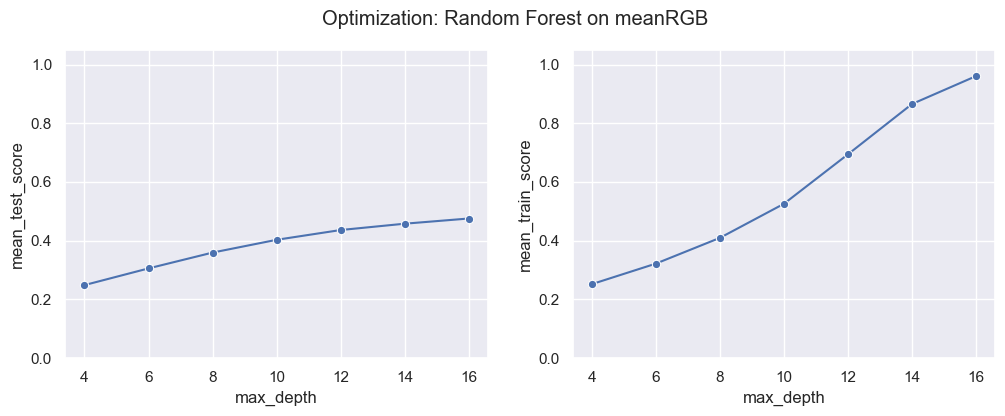

In [104]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[0])

# sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")


sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[1])

# sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0,1.05)
#     ax.set_xscale("log")
#     leg = ax.legend()
#     leg_lines = leg.get_lines()
# #     leg_lines[1].set_linestyle(":")
#     leg_lines[2].set_linestyle(":")
#     leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: Random Forest on meanRGB")

**Train-Test accuracy**

In [115]:
rf_accuracy_train = rf_clf.score(X_train, y_train)
rf_accuracy_test = rf_clf.score(X_test, y_test)

# rf_accuracy_train = grid_rf.score(X_train, y_train)
# rf_accuracy_test = grid_rf.score(X_test, y_test)

print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 0.661
Test  set accuracy 0.428


**Predictions**

In [116]:
y_pred = rf_clf.predict(X_test)
# y_pred = grid_rf.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
#print(cm.shape)
#display(cm)

(27, 25)


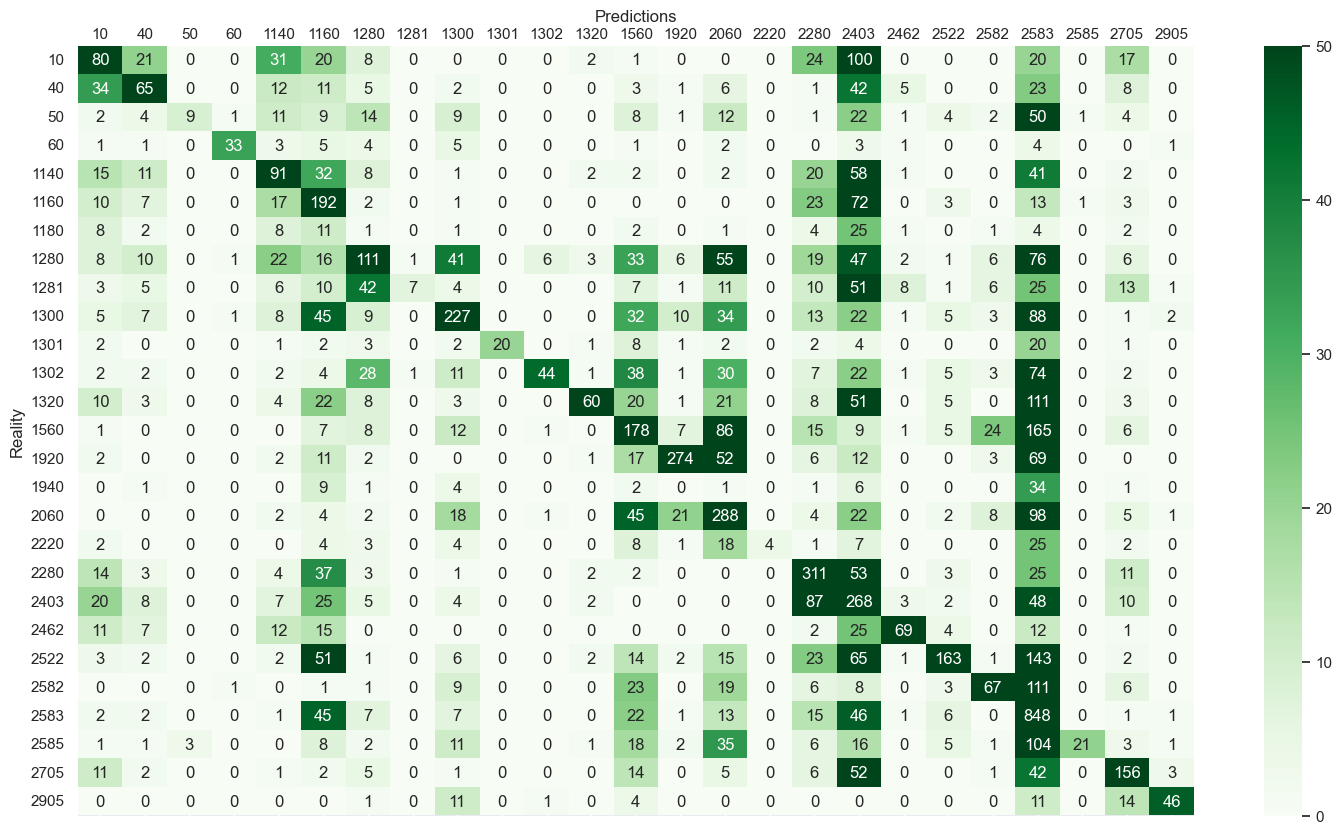

In [117]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 50)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [118]:
export = True

if export:
    filename = 'textModel_rf' + model_date_time + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

textModel_rf_20230807_2330_confusionMatrix.csv


**Classification Report: macro & micro**

In [119]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.32      0.25      0.28       324
          40       0.40      0.30      0.34       218
          50       0.75      0.05      0.10       165
          60       0.89      0.52      0.65        64
        1140       0.37      0.32      0.34       286
        1160       0.32      0.56      0.41       344
        1180       0.00      0.00      0.00        71
        1280       0.39      0.24      0.29       470
        1281       0.78      0.03      0.06       211
        1300       0.57      0.44      0.50       513
        1301       1.00      0.29      0.45        69
        1302       0.83      0.16      0.27       278
        1320       0.78      0.18      0.29       330
        1560       0.35      0.34      0.35       525
        1920       0.83      0.61      0.70       451
        1940       0.00      0.00      0.00        60
        2060       0.41      0.55      0.47       521
        2220       1.00    

C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Top Classified Categories**

In [121]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
14,1920,0.830303,0.607539,0.701665,451.0
3,60,0.891892,0.515625,0.653465,64.0
26,2905,0.821429,0.522727,0.638889,88.0
18,2280,0.505691,0.663113,0.573801,469.0
20,2462,0.718750,0.436709,0.543307,158.0


**Save Classification Report**

In [122]:
export = True

if export:
    filename = 'textModel_rf' + model_date_time + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

textModel_rf_20230807_2330_classificationReport.txt


C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Save trained model**

In [124]:
export = True

if export:
    filename = 'textModel_rf_trainedModel' + model_date_time + '.txt'
    print(filename)
    
    with open(filename, 'w') as file:
        file.write(json.dumps(rf_clf.get_params()))

textModel_rf_trainedModel_20230807_2330.txt


**Load pre-Trained model**

In [89]:
export = False

if export:
    filename = 'textModel_rf_trainedModel' + learnCurve_date_time + '.txt'
    
    with open(filename, 'r') as file:
        reloadedModel = json.load(file)
        
    reloadedModel

# SVM.SVC model


In [172]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
svc_clf = svm.SVC(C = 10, kernel = 'rbf') # kernel = 'poly', gamma = 0.01

## GridSearch
# params = {'gamma' : [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}#,
# #          'C' : [1e3,1e4,1e5,1e6] }

# grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 3,\
#                           return_train_score=True, verbose = 3)

## training (timed)
t0 = time.time()

svc_clf.fit(X_train, y_train)
# grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 33967 observations, training time = 157.04 seconds
_20230808_0001


**Train-Test accuracy**

In [173]:
t0 = time.time()

svc_accuracy_train = svc_clf.score(X_train, y_train)
svc_accuracy_test = svc_clf.score(X_test, y_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy %0.3f" % svc_accuracy_train)
print("Test  set accuracy %0.3f" % svc_accuracy_test)

t1 = time.time()
print("Training and test set accuracy measured in %0.2f seconds" %((t1-t0) ) )

Train set accuracy 0.473
Test  set accuracy 0.432
Training and test set accuracy measured in 257.20 seconds


**Predictions**

In [174]:
t0 = time.time()

y_pred = svc_clf.predict(X_test)
# y_pred = grid_rf_px.predict(X_test)

t1 = time.time()
print("Predictions done in %0.2f seconds" %((t1-t0) ) )

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
#print(cm.shape)
#display(cm)

Predictions done in 53.46 seconds


(27, 26)


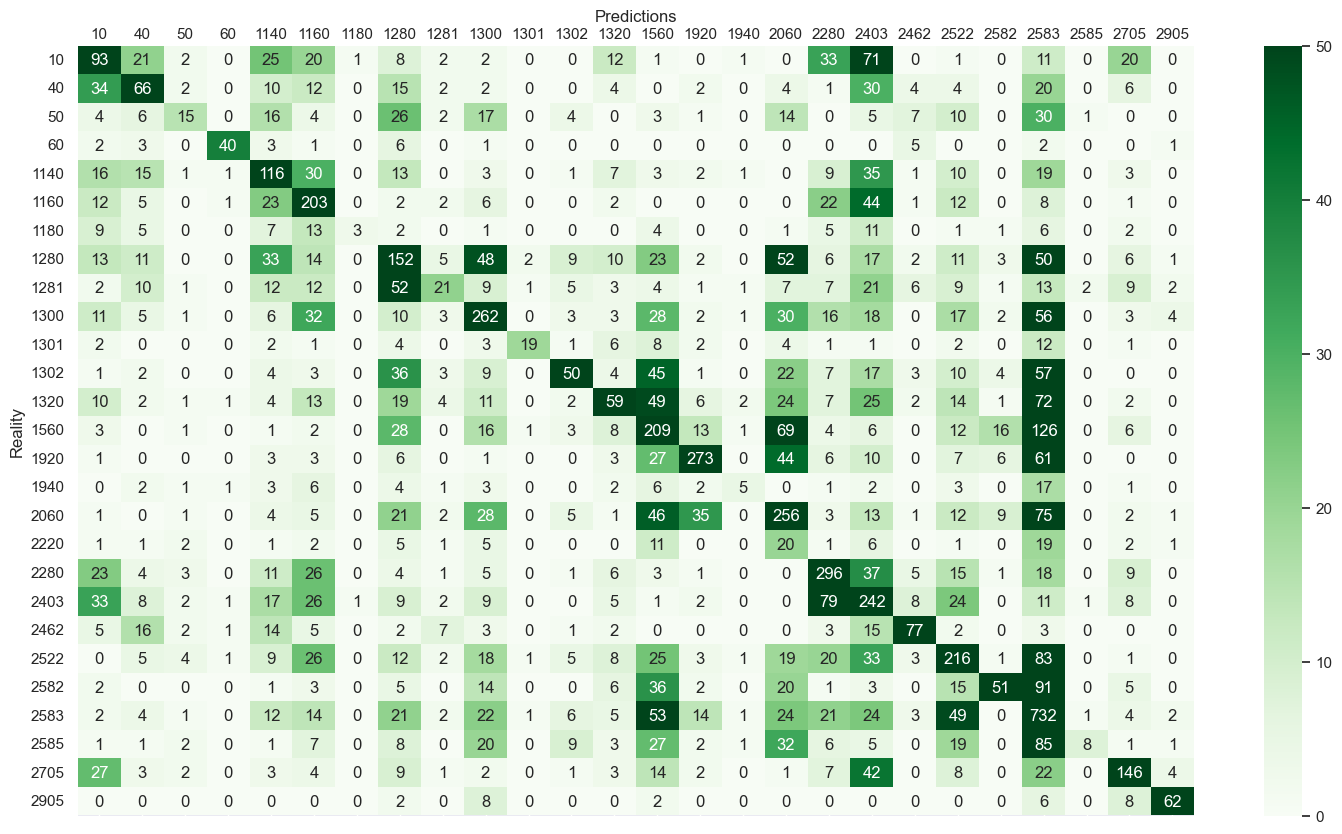

In [175]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 50)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [179]:
export = True

if export:
    filename = 'textModel_svc' + model_date_time + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

textModel_svc_20230808_0001_confusionMatrix.csv


**Classification Report: macro & micro**

In [176]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.30      0.29      0.29       324
          40       0.34      0.30      0.32       218
          50       0.34      0.09      0.14       165
          60       0.85      0.62      0.72        64
        1140       0.34      0.41      0.37       286
        1160       0.42      0.59      0.49       344
        1180       0.60      0.04      0.08        71
        1280       0.32      0.32      0.32       470
        1281       0.33      0.10      0.15       211
        1300       0.50      0.51      0.50       513
        1301       0.76      0.28      0.40        69
        1302       0.47      0.18      0.26       278
        1320       0.36      0.18      0.24       330
        1560       0.33      0.40      0.36       525
        1920       0.74      0.61      0.67       451
        1940       0.33      0.08      0.13        60
        2060       0.40      0.49      0.44       521
        2220       0.00    

C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Top Classified Categories**

In [178]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.784810,0.704545,0.742515,88.0
3,60,0.851064,0.625000,0.720721,64.0
14,1920,0.741848,0.605322,0.666667,451.0
18,2280,0.526690,0.631130,0.574200,469.0
20,2462,0.601562,0.487342,0.538462,158.0


**Save Classification Report**

In [180]:
export = True

if export:
    filename = 'textModel_svc' + model_date_time + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

textModel_svc_20230808_0001_classificationReport.txt


C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Save model hyperparameters**

In [181]:
export = True

if export:
    filename = 'textModel_svc_trainedModel' + model_date_time + '.txt'
    print(filename)
    
    with open(filename, 'w') as file:
        file.write(json.dumps(rf_clf.get_params()))

textModel_svc_trainedModel_20230808_0001.txt


**Load model hyperparameters**

In [185]:
export = True

if export:
    filename = 'textModel_svc_trainedModel_20230808_0001.txt'
    
    with open(filename, 'r') as file:
        reloadedModel = json.load(file)
        
    print(reloadedModel)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


# Simple Neural Network
- [x] Normalize features [0,1] range

- [ ] LAbelEncoder target to go from 0 to 26
- [ ] One hot encode target variable: vector --> matrix

- [ ] NN model
- [ ] NN compiler
- [ ] 

**Label encoder**

In [29]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

target_encoder.classes_
# target_encoder.inverse_transform(y_test)
# target_encoder.inverse_transform([18])

array([  10,   40,   50,   60, 1140, 1160, 1180, 1280, 1281, 1300, 1301,
       1302, 1320, 1560, 1920, 1940, 2060, 2220, 2280, 2403, 2462, 2522,
       2582, 2583, 2585, 2705, 2905], dtype=int64)

In [149]:
y_train.index

Int64Index([ 9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947,
            32350,
            ...
            29427,  6336, 69930, 71944, 18110, 19372, 79662, 38386, 84570,
            60763],
           dtype='int64', length=67932)

**On-Hot-Encoding of target variables**

In [30]:
from tensorflow.keras.utils import to_categorical

yy_train = to_categorical(y_train_encoded, dtype = 'int') 
yy_test = to_categorical(y_test_encoded, dtype = 'int')   

yy_train.shape

(67932, 27)

In [31]:
i = 20
print("Exmaple %d: Class '%d' is encoded as vector:"%(i, y_train.iloc[i]), y_train_encoded[i], yy_train[i,:])

Exmaple 20: Class '1300' is encoded as vector: 9 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Define model : NN layers**

In [148]:
X_train.shape

scipy.sparse._coo.coo_matrix

In [138]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## data dimensions
Nb_features = X_train.shape[1]
Nb_classes = yy_train.shape[1]


## instantiate layers

inputs = Input(shape = Nb_features, name = "Input")

dense1 = Dense(units = 256, activation = "relu", \
               kernel_initializer ='normal', name = "Dense_1")

dense2 = Dense(units = Nb_classes, activation = "softmax", \
               kernel_initializer ='normal', name = "Dense_2")


## link layers & model

x = dense1(inputs)
outputs = dense2(x)

NN_clf = Model(inputs = inputs, outputs = outputs)

In [139]:
## to visualize a schema of the model

NN_clf.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5037)]            0         
                                                                 
 Dense_1 (Dense)             (None, 256)               1289728   
                                                                 
 Dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,296,667
Trainable params: 1,296,667
Non-trainable params: 0
_________________________________________________________________


**Define training process**

In [140]:
NN_clf.compile(loss = 'categorical_crossentropy',  
              optimizer = 'adam',                 
              metrics = ['accuracy'])             


**Train Model**

In [141]:
t0 = time.time()

training_history = NN_clf.fit(X_train.toarray(), yy_train,          
                             epochs = 2,               
                             batch_size = 200,          
                             validation_split = 0.2)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

Epoch 1/2
272/272 [==============================] - 4s 12ms/step - loss: 1.8170 - accuracy: 0.5348 - val_loss: 1.0071 - val_accuracy: 0.7289
Epoch 2/2
272/272 [==============================] - 3s 10ms/step - loss: 0.8184 - accuracy: 0.7665 - val_loss: 0.7938 - val_accuracy: 0.7617
For 67932 observations, training time = 7.84 seconds
20230812_1817


**Score Evolution during training**

In [144]:
epochs = 2
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

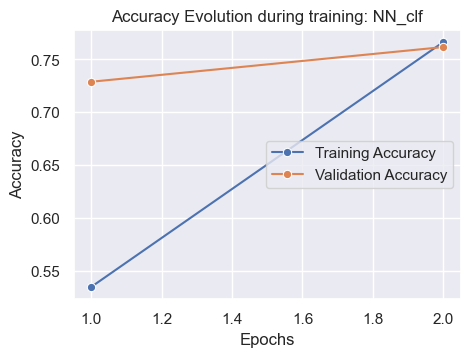

In [145]:
plt.figure(figsize=(5,3.5))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='right')
# plt.ylim(0.72,0.8)

In [146]:
val_acc

[0.728858470916748, 0.7616839408874512]

**Train-Test accuracy**

In [147]:
loss_train, NN_accuracy_train = NN_clf.evaluate(X_train.toarray(), yy_train)
loss_test, NN_accuracy_test = NN_clf.evaluate(X_test.toarray(), yy_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_train, loss_train) )
print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

531/531 [==============================] - 3s 5ms/step - loss: 0.8219 - accuracy: 0.7550
Train set accuracy = 0.800 and loss function = 0.69
Test  set accuracy = 0.755 and loss function = 0.82


**Predictions**

In [110]:
y_pred_vectors = NN_clf.predict(X_test.toarray())

## reverse One-hot-encoding
y_pred_class = y_pred_vectors.argmax(axis = 1)
yy_test_class = yy_test.argmax(axis = 1)

## reverse label encoder
y_pred = target_encoder.inverse_transform(y_pred_class)
yy_test_prdCode = target_encoder.inverse_transform(yy_test_class)   # should be equal to y_test



531/531 [==============================] - 3s 6ms/step


In [111]:
print(yy_test_prdCode)
print(y_test.values)

[1140 1320 2582 ... 2280 2522 1920]
[1140 1320 2582 ... 2280 2522 1920]


**Confussion Matrix**

In [112]:
cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
#print(cm.shape)
#display(cm)

(27, 27)


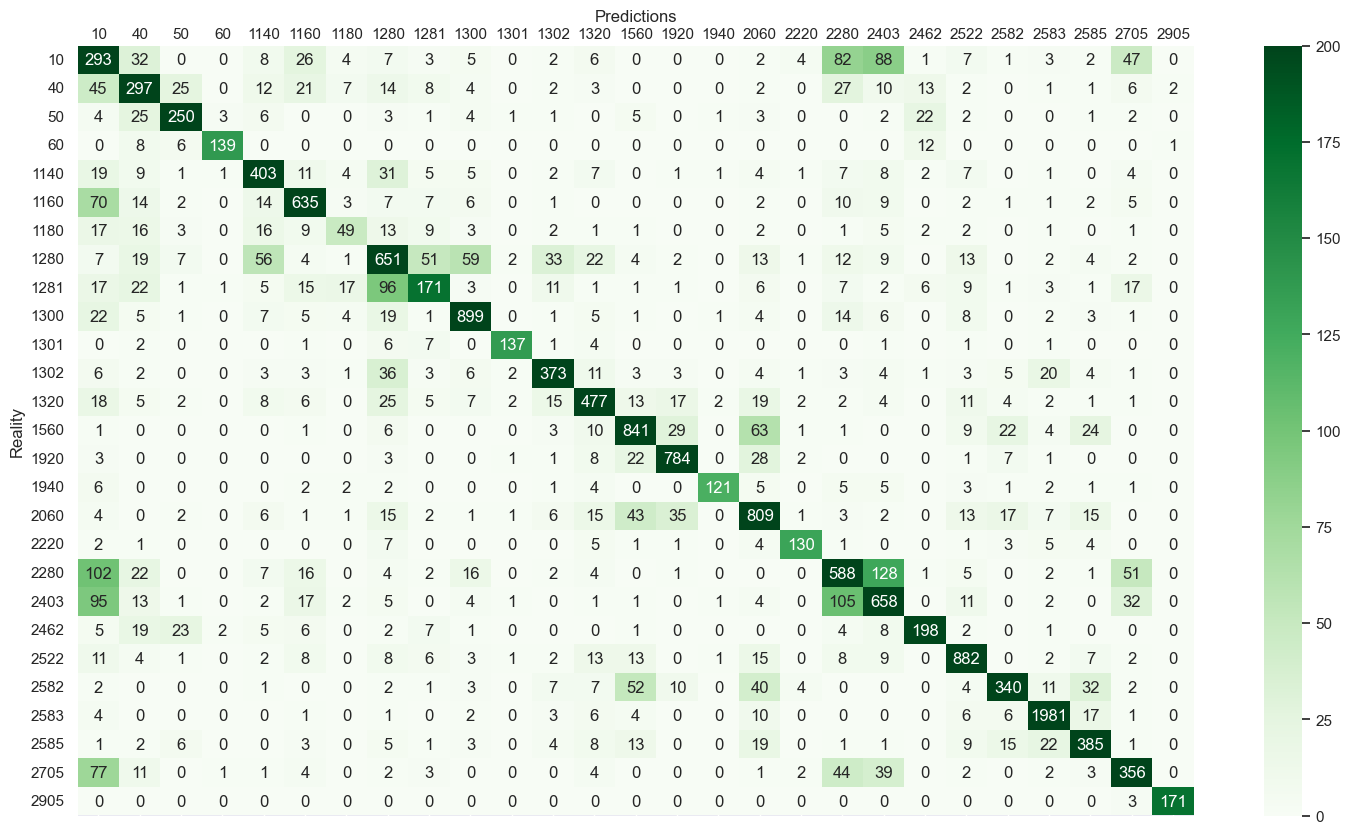

In [113]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 200)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [60]:
export = False

if export:
    filename = 'textModel_svc' + model_date_time + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

**Classification Report: macro & micro**

In [114]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.35      0.47      0.40       623
          40       0.56      0.59      0.58       502
          50       0.76      0.74      0.75       336
          60       0.95      0.84      0.89       166
        1140       0.72      0.75      0.74       534
        1160       0.80      0.80      0.80       791
        1180       0.52      0.32      0.40       153
        1280       0.67      0.67      0.67       974
        1281       0.58      0.41      0.48       414
        1300       0.87      0.89      0.88      1009
        1301       0.93      0.85      0.89       161
        1302       0.79      0.75      0.77       498
        1320       0.77      0.74      0.75       648
        1560       0.83      0.83      0.83      1015
        1920       0.89      0.91      0.90       861
        1940       0.95      0.75      0.84       161
        2060       0.76      0.81      0.79       999
        2220       0.87    

**Top Classified Categories**

In [119]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.515789,0.320261,0.395161,153.0
0,10,0.352587,0.470305,0.403026,623.0
8,1281,0.583618,0.413043,0.483734,414.0
1,40,0.562500,0.591633,0.576699,502.0
18,2280,0.635676,0.617647,0.626532,952.0


**Save Classification Report**

In [280]:
export = False

if export:
    filename = 'textModel_svc' + model_date_time + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

**Save trained model**

In [284]:
export = False

if export:
    filename = 'textModel_NN_trainedModel' + model_date_time + '.txt'
    
    with open(filename, 'w') as file:
        file.write(json.dumps(NN_clf.get_params()))
        print(filename)


**Load pre-Trained model**

In [283]:
reload = False

if reload:
    filename = 'textModel_NN_trainedModel' + learnCurve_date_time + '.txt'
    
    with open(filename, 'r') as file:
        reloadedModel = json.load(file)
        
    reloadedModel

## Parameters tunning

**My grid search**

In [41]:
def my_grid_search(params, X_train, y_train, X_test, y_test, Nepoch = 25, batch_sz = 200):
    
    '''
    params : d1_unit, d1_act
    '''

    ## build model
    Nb_features = X_train.shape[1]
    Nb_classes = y_train.shape[1]
    
    param_trained = []
    train_histories = []
    
    train_acc_hist = []
    val_acc_hist = []
    
    acc_train = []
    acc_test = []

    losses_train = []
    losses_test = []

    
    for d1_unit in params['d1_units']:
        for d1_act in params['d1_act']:
            
            param_trained.append( (d1_unit, d1_act) ) 
            NN_clf = initialize_model(Nb_features, Nb_classes, d1_units = d1_unit, d1_act = d1_act)
    
            ## train model
            training_history = NN_clf.fit(X_train.toarray(), y_train,          
                             epochs = Nepoch,               
                             batch_size = batch_sz,          
                             validation_split = 0.2)
            
            train_histories.append(training_history)
            
            train_acc_hist.append(list(training_history.history['accuracy']))
            val_acc_hist.append(list(training_history.history['val_accuracy']))
            
            ## train test accuracy
            loss_train, accuracy_train = NN_clf.evaluate(X_train.toarray(), y_train)
            loss_test, accuracy_test = NN_clf.evaluate(X_test.toarray(), y_test)
            
            losses_train.append(loss_train)
            losses_test.append(loss_test)

            acc_train.append(accuracy_train)
            acc_test.append(accuracy_test)
            
#             loss_accuracy_train.append(NN_clf.evaluate(X_train.toarray(), y_train))
#             loss_accuracy_test.append(NN_clf.evaluate(X_test.toarray(), y_test))    
            
            
    results = {'param_trained' : param_trained,
               'train_histories' : train_histories,
               'train_acc_hist' : train_acc_hist,
               'val_acc_hist' : val_acc_hist,
               'accuracy_train' : acc_train,
               'accuracy_test' : acc_test,
               'loss_train' : losses_train,
               'loss_test' : losses_test}
            

    return results


def initialize_model(Nb_features, Nb_classes, d1_units = 64, d1_act = 'relu'):

    from tensorflow.keras.layers import Input, Dense
    from tensorflow.keras.models import Model
    
    ## instantiate layers
    inputs = Input(shape = Nb_features, name = "Input")
    dense1 = Dense(units = d1_units, activation = d1_act, \
                   kernel_initializer ='normal', name = "Dense_1")
    dense2 = Dense(units = Nb_classes, activation = "softmax", \
                   kernel_initializer ='normal', name = "Dense_2")


    ## link layers & model
    x = dense1(inputs)
    outputs = dense2(x)
    NN_clf = Model(inputs = inputs, outputs = outputs)
    
    
    ## compile
    NN_clf.compile(loss = 'categorical_crossentropy',  
              optimizer = 'adam',                 
              metrics = ['accuracy'])             

    
    return NN_clf

In [42]:
t0 = time.time()

parameters = {'d1_units' : [16, 32, 64, 128, 256, 512, 1024],
              'd1_act' : ['relu']}

#X_train =X_train, y_train = yy_train, X_test = X_test, y_test=yy_test
#X_train, yy_train, X_test, yy_test
grid_results = my_grid_search(params = parameters, 
                              X_train = X_train, y_train = yy_train, 
                              X_test = X_test, y_test = yy_test,
                              Nepoch = 25, batch_sz = 200)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Epoch 1/25
272/272 [==============================] - 4s 11ms/step - loss: 2.8283 - accuracy: 0.1913 - val_loss: 2.3084 - val_accuracy: 0.3900
Epoch 2/25
272/272 [==============================] - 2s 9ms/step - loss: 1.9582 - accuracy: 0.4955 - val_loss: 1.6755 - val_accuracy: 0.5681
Epoch 3/25
272/272 [==============================] - 2s 8ms/step - loss: 1.4617 - accuracy: 0.6263 - val_loss: 1.3180 - val_accuracy: 0.6559
Epoch 4/25
272/272 [==============================] - 3s 10ms/step - loss: 1.1763 - accuracy: 0.6893 - val_loss: 1.1259 - val_accuracy: 0.6942
Epoch 5/25
272/272 [==============================] - 2s 9ms/step - loss: 1.0130 - accuracy: 0.7246 - val_loss: 1.0163 - val_accuracy: 0.7188
Epoch 6/25
272/272 [==============================] - 2s 7ms/step - loss: 0.9089 - accuracy: 0.7483 - val_loss: 0.9493 - val_accuracy: 0.7303
Epoch 7/25
272/272 [==============================] - 3s 10ms/step - loss: 0.8365 - accuracy: 0.7641 - val_loss: 0.9036 - val_accuracy: 0.7378
Epo

Epoch 6/25
272/272 [==============================] - 3s 10ms/step - loss: 0.5968 - accuracy: 0.8234 - val_loss: 0.7476 - val_accuracy: 0.7727
Epoch 7/25
272/272 [==============================] - 2s 8ms/step - loss: 0.5499 - accuracy: 0.8365 - val_loss: 0.7384 - val_accuracy: 0.7743
Epoch 8/25
272/272 [==============================] - 3s 10ms/step - loss: 0.5118 - accuracy: 0.8459 - val_loss: 0.7353 - val_accuracy: 0.7760
Epoch 9/25
272/272 [==============================] - 3s 10ms/step - loss: 0.4790 - accuracy: 0.8565 - val_loss: 0.7364 - val_accuracy: 0.7765
Epoch 10/25
272/272 [==============================] - 3s 10ms/step - loss: 0.4514 - accuracy: 0.8642 - val_loss: 0.7393 - val_accuracy: 0.7739
Epoch 11/25
272/272 [==============================] - 3s 11ms/step - loss: 0.4264 - accuracy: 0.8709 - val_loss: 0.7467 - val_accuracy: 0.7739
Epoch 12/25
272/272 [==============================] - 2s 8ms/step - loss: 0.4048 - accuracy: 0.8781 - val_loss: 0.7532 - val_accuracy: 0.773

Epoch 11/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2957 - accuracy: 0.9091 - val_loss: 0.8491 - val_accuracy: 0.7674
Epoch 12/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2798 - accuracy: 0.9132 - val_loss: 0.8727 - val_accuracy: 0.7645
Epoch 13/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2663 - accuracy: 0.9166 - val_loss: 0.8976 - val_accuracy: 0.7633
Epoch 14/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2540 - accuracy: 0.9204 - val_loss: 0.9225 - val_accuracy: 0.7609
Epoch 15/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2435 - accuracy: 0.9237 - val_loss: 0.9459 - val_accuracy: 0.7620
Epoch 16/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2349 - accuracy: 0.9252 - val_loss: 0.9692 - val_accuracy: 0.7590
Epoch 17/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2264 - accuracy: 0.9274 - val_loss: 0.9966 - val_accuracy:

In [43]:
d1_units = [ item[0] for item in grid_results['param_trained']]
d1_act = [ item[1] for item in grid_results['param_trained']]
accuracy_train = grid_results['accuracy_train']
accuracy_test = grid_results['accuracy_test']

In [ ]:
sns.

Text(0.5, 0, 'Nb of units in D1 layer')

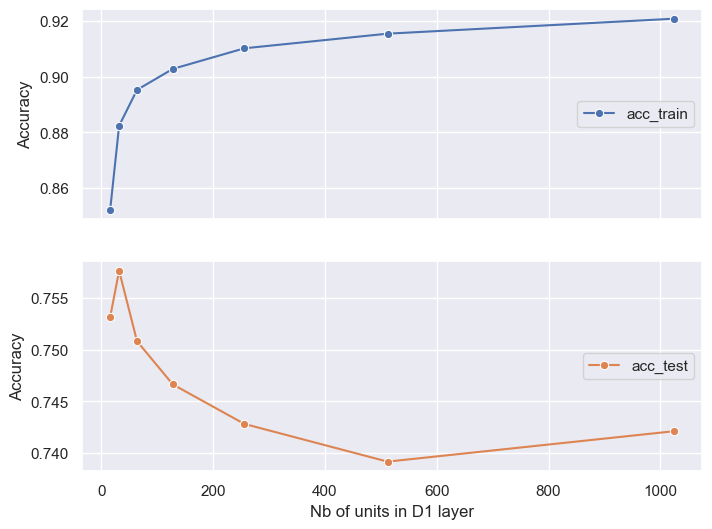

In [99]:
fig, axs = plt.subplots(2,1,figsize=(8,6), sharex = True)

colors = sns.color_palette()

sns.lineplot(x = d1_units, y = accuracy_train, marker = 'o', ax = axs[0], label='acc_train')
sns.lineplot(x = d1_units, y = accuracy_test, marker = 'o', ax = axs[1], color =colors[1], label='acc_test')

for ax in axs:
    ax.set_ylabel('Accuracy')
    ax.legend(loc='right')
plt.xlabel('Nb of units in D1 layer')

In [95]:
max(accuracy_test)

0.7576542496681213

**learning curve**

In [45]:
grid_results['train_histories']

In [46]:
Nepoch = 25
x_epochs = np.arange(1,Nepoch+1,1)
training_history = grid_results['train_histories']

In [47]:
sns.color_palette()[0]


(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

(0.0, 10.0)

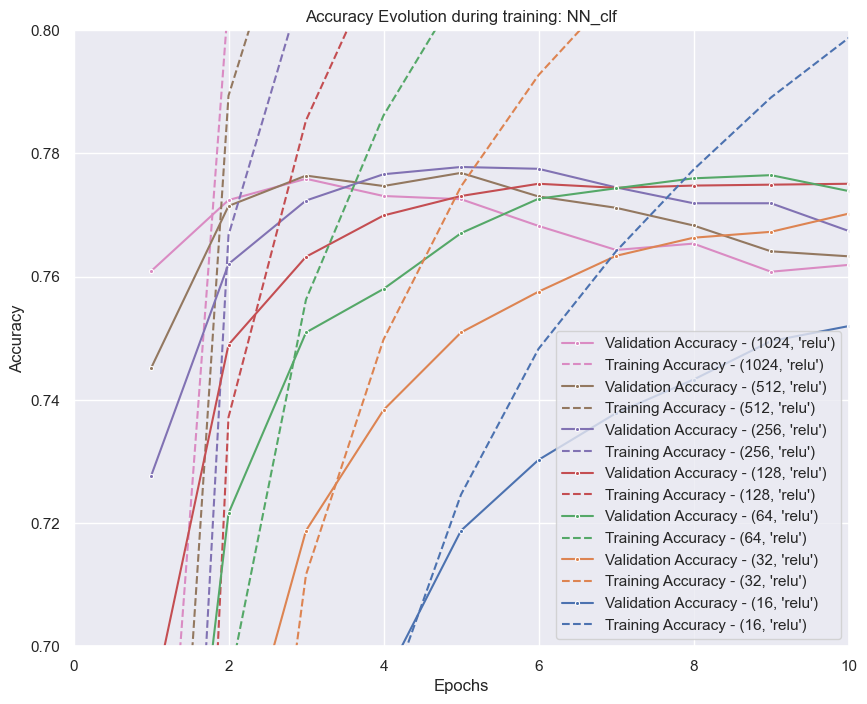

In [101]:
plt.figure(figsize=(10,8))

for i in range(len(training_history)-1,-1,-1):
    
    train_acc_hist = list(training_history[i].history['accuracy'])
    val_acc_hist = list(training_history[i].history['val_accuracy'])
    hist_params = str(grid_results['param_trained'][i])
    
    color =  sns.color_palette()[i]

    sns.lineplot(x = x_epochs, y = val_acc_hist, color = color, marker = '.', label = 'Validation Accuracy - ' + hist_params)
    sns.lineplot(x = x_epochs, y = train_acc_hist, color = color, ls = '--', label = 'Training Accuracy - ' + hist_params)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend()
plt.ylim([0.7,0.80])
plt.xlim([0,10])

In [227]:
list(grid_results['train_histories'][0].history['accuracy'])
# len(x_epochs)

[0.11839175969362259,
 0.14225779473781586,
 0.18360474705696106,
 0.1989879459142685,
 0.20478424429893494,
 0.21177661418914795,
 0.22002023458480835,
 0.23107922077178955,
 0.2416597604751587,
 0.25577330589294434,
 0.27238935232162476,
 0.28541722893714905,
 0.2939368784427643,
 0.3029901683330536,
 0.3079584240913391,
 0.3126874566078186,
 0.3187413811683655,
 0.32277119159698486,
 0.3251081109046936,
 0.32950592041015625,
 0.3321188688278198,
 0.33576226234436035,
 0.33795198798179626,
 0.3403624892234802,
 0.3422577977180481,
 0.3435274660587311,
 0.34601157903671265,
 0.3465268313884735,
 0.3500230014324188,
 0.35007819533348083,
 0.35167908668518066,
 0.3532247543334961,
 0.3547888398170471,
 0.35488083958625793,
 0.35642653703689575,
 0.35714417695999146,
 0.3588370680809021,
 0.3600147068500519,
 0.3594994843006134,
 0.36133959889411926,
 0.36196520924568176,
 0.3622044324874878,
 0.3630508780479431,
 0.3643757402896881,
 0.3649093806743622,
 0.3651301860809326,
 0.365774214

**save grid resulst**

In [52]:
grid_results.keys()

dict_keys(['param_trained', 'train_histories', 'train_acc_hist', 'val_acc_hist', 'accuracy_train', 'accuracy_test', 'loss_train', 'loss_test'])

In [63]:
len(grid_results['val_acc_hist'])

7

In [67]:
export = True

grid_model_date_time = date_time()

grid_results_to_save = grid_results.copy()
grid_results_to_save.pop('train_histories')
# grid_results_to_save['train_acc_hist'] = list(grid_results['train_histories'][0].history['accuracy'])
# grid_results_to_save['val_acc_hist'] = list(grid_results['train_histories'][0].history['val_accuracy'])

if export:
    filename = './Trained_models_and_metrics/' + grid_model_date_time + '_NN_grid_results' +  '.txt'
    print(filename)
    
    with open(filename, 'w') as file:
#         file.write(json.dumps(grid_results_to_save))
        json.dump(grid_results_to_save, file)

./Trained_models_and_metrics/20230812_1731_NN_grid_results.txt


In [ ]:
json.load(./Trained_models_and_metrics/_20230811_2137_NN_grid_results.txt)

In [76]:
file = './Trained_models_and_metrics/20230812_1731_NN_grid_results.txt'
with open(file, 'r') as f:
    reloaded_dict = json.load(f)

In [77]:
reloaded_dict.keys()

dict_keys(['param_trained', 'train_acc_hist', 'val_acc_hist', 'accuracy_train', 'accuracy_test', 'loss_train', 'loss_test'])

In [80]:
len(reloaded_dict['param_trained'])

7

# Exporting preprocessed text

In [92]:
write = False
if write:
    filename = 'df_text_preprocessed' + '.csv'
    df.to_csv(filename, header=True, index=False)

In [ ]:
write_pickle = False

t0 = time.time()
if write_pickle:
    filename = 'df_text_preprocessed' + '.pkl'
    df_vectorized_images.to_pickle(filename) #, header=True, index=False

print("Total time = %0.2f seconds" %(time.time()-t0) )    
write_pickle = False

### Most Common words per category 
[ ] how to include this information ? in the dataframe or a model ?

### Feature engineering: Statistical indicators per category
These are the mean, min, max, etc of text_token_len per category.

[ ] How to include them in the dataframe ???

### Save trained model ready to use

In [ ]:
save = False
reload = False

#saved_model = 'Model_svm_optimmized' + model_date_time + '.joblib'
saved_model = 'Model_svm_optimmized' + '_20230803_0742' + '.joblib'

from joblib import dump, load

if save:
    dump(svc_clf, saved_model) #

if reload:
#     my_model=load(saved_model)
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

# Dump non used functions

**CountVectorize -> TFIDF_transform**

In [191]:
# def token_to_text(token_list):
#     '''
#     Concatenate all token of an item to for a sentence (lemmatized already)
#     '''
#     text = '' 
#     for token in token_list:
#         text = text + token + ' '
#     return text

# token_to_text(df.loc[0,'lemma_tokens'])

In [192]:
# data_train['lemma_text'] = data_train['lemma_tokens'].apply(token_to_text)
# data_test['lemma_text'] = data_test['lemma_tokens'].apply(token_to_text)

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = do_nothing, lowercase=False) #max_features=5000, 

#vectorText_train = vectorizer.fit_transform(df['lemma_tokens'].apply(token_to_text))
lemma_vector_train = vectorizer.fit_transform(data_train['lemma_tokens'])
lemma_vector_test = vectorizer.transform(data_test['lemma_tokens'])


In [204]:
## print info about the vectorizer trained
# vectorizer.get_feature_names_out()
print(len(vectorizer.vocabulary_))
#vectorizer.vocabulary_.get('charles')

## print info about the vectors obtained
# lemma_vector_train.toarray().shape
lemma_vector_train.toarray()[1,:100]

42648


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [175]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer_TFIDF = TfidfTransformer(smooth_idf=True)

tfidf_train = transformer_TFIDF.fit_transform(lemma_vector_train)

In [176]:
tfidf_train.toarray()[1,:100]

array([0.11640882, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06369834, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13745048,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**For Scaling token_len**

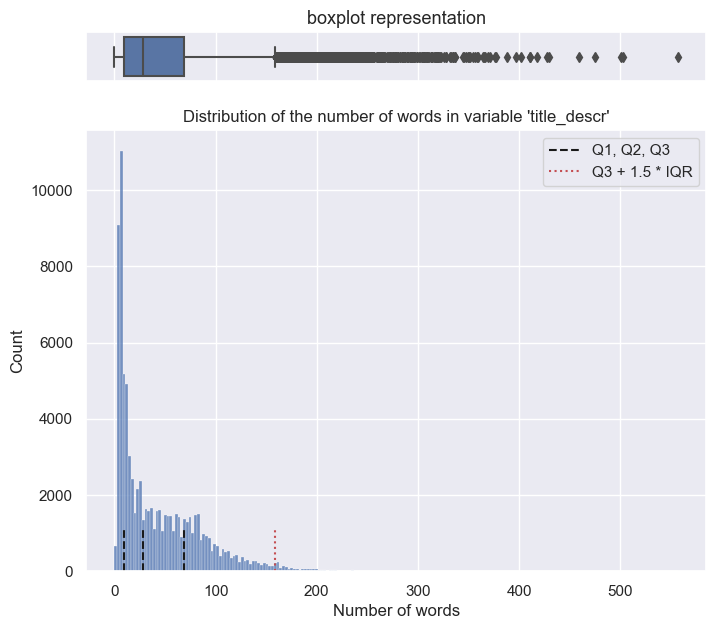

In [307]:
# quantile values
q1, q2, q3 = df['text_token_len'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fsize = 14



fig, (ax_box, ax_hist) = plt.subplots(2, figsize = (8,7), sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
plt.title("Distribution of the number of words in variable 'title_descr'")#, fontsize = fsize)

## Box plot
sns.boxplot(x = df.text_token_len, ax = ax_box)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('boxplot representation', fontsize = 13)
## hist plot

sns.histplot(x = df.text_token_len, ax = ax_hist)#, kde = True

# add quantiles and extreme values markers
ax_hist.axvline(x=q1, ymin= 0, ymax = 0.1, c='k', ls = '--', label='Q1, Q2, Q3')
ax_hist.axvline(x=q2, ymin= 0, ymax = 0.1, c='k', ls = '--')
ax_hist.axvline(x=q3, ymin= 0, ymax = 0.1, c='k', ls = '--')
ax_hist.axvline(x=q3+1.5*iqr, ymin= 0, ymax = 0.1, c='r', ls = ':', label='Q3 + 1.5 * IQR')
ax_hist.legend()

plt.xlabel('Number of words')
#plt.xlim([0,500])
#plt.ylim([0,10])
plt.show()